# GA Toolbox for DEAP

One of the nice things about DEAP is its set of prepackaged algorithms. This notebook tackles OneMax using the built-in Genetic Algorithm and can be easily adapted to other GA problems

Install DEAP. 

In [ ]:
!pip install deap

Import the DEAP tools and useful libraries (random and matplotlib). Notice this time we have the **algorithms** package too and that we also import **numpy** which provides some useful mathematical functions.

In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt

Set our Genetic Algorithm parameters.  We also define the HALL_OF_FAME_SIZE to keep track of good individuals who may be lost due to unfortunate selection events.

In [2]:
# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 0.01   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10


Set any problem-specific constants here. In this case we need to know how long the string is.

In [3]:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

Set the random seed. 

In [4]:
RANDOM_SEED = 412
random.seed(RANDOM_SEED)

Create our toolbox. Note that this is the same is in our original example.

In [5]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selRoulette)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)



Create the initial population and define the hall-of-fame object. Notice that we don't need to keep track of the current generation like we did in the previous example.

In [6]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

Create a statistics object that uses some of the functionality from numpy.

In [7]:
# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

Now we run our GA using a call to **algorithms.eaSimple**. Notice how we pass all the important parameters such as operator probalities to it. This function returns a *population* and a *logbook*; the former is the final population while the latter are all the statistics we requested earlier. 

As time goes on, our logbook will get more complex, but for now we're happy with this.

Notice the GA runs with just one command!

In [8]:
# perform the Genetic Algorithm flow:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats, halloffame=hof, verbose=True)


gen	nevals	max	avg  
0  	100   	61 	49.94
1  	74    	60 	51.53
2  	70    	61 	51.62
3  	62    	60 	52.28
4  	66    	64 	53.05
5  	76    	63 	53   
6  	84    	63 	53.34
7  	70    	64 	54.21
8  	64    	65 	55.18
9  	76    	65 	55.27
10 	68    	64 	55.87
11 	79    	67 	55.83
12 	76    	68 	56.39
13 	64    	63 	55.87
14 	72    	65 	56.23
15 	71    	65 	56.57
16 	68    	65 	57.35
17 	74    	66 	57.43
18 	66    	65 	57.23
19 	76    	64 	57.17
20 	73    	64 	57.71
21 	73    	65 	57.34
22 	68    	64 	57.43
23 	68    	66 	58.03
24 	90    	67 	58.04
25 	68    	66 	58.33
26 	67    	67 	58.35
27 	72    	66 	58.59
28 	66    	67 	59.18
29 	64    	66 	59.44
30 	72    	67 	59.6 
31 	76    	68 	59.44
32 	70    	70 	59.62
33 	66    	70 	59.02
34 	68    	67 	59.22
35 	80    	67 	59.47
36 	76    	67 	59.74
37 	73    	67 	60.25
38 	80    	69 	60.22
39 	82    	71 	60.91
40 	76    	69 	61.07
41 	71    	71 	61.45
42 	74    	71 	61.43
43 	82    	69 	62   
44 	63    	70 	61.58
45 	80    	68 	61.25
46 	65    	69

Let's take a look at our Hall Of Fame and the best individual we encountered.

In [9]:
# print Hall of Fame info:
print("Hall of Fame Individuals = ", *hof.items, sep="\n")
print("Best Ever Individual = ", hof.items[0])


Hall of Fame Individuals = 
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

Okay, not that easy to read, but we could easily copy one out and pass it to some other simulator for manipulation.

Extract our fancy numpy statistics and draw a nice graph.

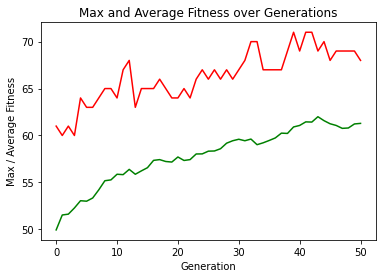

In [10]:
# Genetic Algorithm is done - extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# Genetic Algorithm is done - plot statistics:
#sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()